# Beach Hotels in India

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
URL='https://www.booking.com/searchresults.en-gb.html?sid=a493cb0452ebd09719123e159e742410&aid=813046&lang=en-gb&src=searchresults&error_url=https%3A%2F%2Fwww.booking.com%2Fsearchresults.en-gb.html%3Faid%3D813046%3Bsid%3Da493cb0452ebd09719123e159e742410%3Btmpl%3Dsearchresults%3Bac_click_type%3Db%3Bac_position%3D0%3Bcheckin_month%3D1%3Bcheckin_monthday%3D15%3Bcheckin_year%3D2022%3Bcheckout_month%3D1%3Bcheckout_monthday%3D22%3Bcheckout_year%3D2022%3Bclass_interval%3D1%3Bdest_id%3D98%3Bdest_type%3Dcountry%3Bdtdisc%3D0%3Bfrom_sf%3D1%3Bgroup_adults%3D2%3Bgroup_children%3D0%3Binac%3D0%3Bindex_postcard%3D0%3Blabel_click%3Dundef%3Bnflt%3Dpopular_activities%253D302%253Bpri%253D3%253Bpri%253D4%253Bpri%253D5%253Bpri%253D2%3Bno_rooms%3D1%3Boffset%3D0%3Bpostcard%3D0%3Braw_dest_type%3Dcountry%3Broom1%3DA%252CA%3Bsb_price_type%3Dtotal%3Bsearch_selected%3D1%3Bshw_aparth%3D1%3Bslp_r_match%3D0%3Bsrc%3Dindex%3Bsrpvid%3D6b0a518a51250123%3Bss%3DIndia%3Bss_all%3D0%3Bss_raw%3Dindia%3Bssb%3Dempty%3Bsshis%3D0%3Bssne%3DIndianapolis%3Bssne_untouched%3DIndianapolis%26%3B&ss=India&is_ski_area=0&ssne=India&ssne_untouched=India&dest_id=98&dest_type=country&checkin_year=2022&checkin_month=2&checkin_monthday=5&checkout_year=2022&checkout_month=2&checkout_monthday=6&group_adults=1&group_children=0&no_rooms=1&from_sf=1&nflt=ht_beach%3D1%3Bpopular_activities%3D302'
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"}

page =requests.get(URL, headers=headers)

soup1 = BeautifulSoup(page.content, "html.parser")

soup2 = BeautifulSoup(soup1.prettify(),"html.parser")

print(soup1)

<!DOCTYPE html>

<!--
You know you could be getting paid to poke around in our code?
We're hiring designers and developers to work in Amsterdam:
https://careers.booking.com/
-->
<!-- wdot-802 -->
<script nonce="4hprl2HAYYXN0Mz" type="text/javascript">
document.addEventListener('DOMContentLoaded', function () {
//c360 javascript tracker first iteration
//sends a track request to c360 http tracker
//in order to use it:
//1. inline the c360Tracker.js in the page you need to use it
//2. in your js file:
//
// var c360Tracker = B.require('c360Tracker');
// var event = {
// action_name:"accommodation_checkout_confirmation_viewed",
// action_version :"0.2.0",
// content : { "transaction_id" : 123434},
// user : { "BKNG_user_id": 123434}
// };
// c360Tracker.track(event);
B.define('c360Tracker', function () {
var enrichedContext = {};
var configuration = {
validateInput: false
};
var track = function (event) {
if (event == null) {
return "event object is null or empty";
} else {
//if (enriched

## Scraping  the Data

In [3]:
title = soup2.find('div', attrs={'class':'fde444d7ef _c445487e2'})

In [4]:
title.text

'\n                           Praia Da Oura - Boutique Resort\n                          '

In [5]:
titles=[] 
locations=[]
reviews=[]
badges=[]
scores=[]
originalprices=[] 
discountprices=[]
roomtypes = [] #List to store the number of ratings & reviews of the product
hotelcomplimentarys= [] # to store the specifications
pgno = []

for i in range(1,30):
    
    for x in soup2.find_all('div', attrs={'class':"_5d6c618c8"}):
        title = x.find('div', attrs={'class':"fde444d7ef _c445487e2"})
        if title is None:
            titles.append(np.NaN)
        else:
            titles.append(title.text)

        location = x.find('div', attrs={'class':"_cff98816f"})
        if location is None:
            locations.append(np.NaN)
        else:
            locations.append(location.text)

        badge = x.find('div', attrs={'class': "_9c5f726ff _192b3a196 f1cbb919ef"})
        if badge is None:
            badges.append(np.NaN)
        else:
            badges.append(badge.text)

        review = x.find('div', attrs={'class': "_4abc4c3d5 _1e6021d2f _6e869d6e0"})
        if review is None:
            reviews.append(np.NaN)
        else:
            reviews.append(review.text)

        score = x.find('div', attrs={'class': "_9c5f726ff bd528f9ea6"})
        if score is None:
            scores.append(np.NaN)
        else:
            scores.append(score.text)

        originalprice = x.find('span', attrs={'class': "_a11e76d75 _6b0bd403c"})
        if originalprice is None:
            originalprices.append(np.NaN)
        else:
            originalprices.append(originalprice.text)

        discountprice = x.find('span', attrs={'class': "fde444d7ef _e885fdc12"})
        if discountprice is None:
            discountprices.append(np.NaN)
        else:
            discountprices.append(discountprice.text)

        roomtype = x.find('span', attrs={'class': "_c5d12bf22"})
        if roomtype is None:
            roomtypes.append(np.NaN)
        else:
            roomtypes.append(roomtype.text)

        hotelcomplimentary = x.find('span', attrs={'class': "c79699a040"})
        if hotelcomplimentary is None:
            hotelcomplimentarys.append(np.NaN)
        else:
            hotelcomplimentarys.append(hotelcomplimentary.text)

        pgno.append(i)

    print('Page {} completed in {} seconds'.format(i, time.time()))

Page 1 completed in 1643623413.6615005 seconds
Page 2 completed in 1643623413.931099 seconds
Page 3 completed in 1643623414.1877425 seconds
Page 4 completed in 1643623414.4112601 seconds
Page 5 completed in 1643623414.629593 seconds
Page 6 completed in 1643623414.8738039 seconds
Page 7 completed in 1643623415.1601524 seconds
Page 8 completed in 1643623415.3953462 seconds
Page 9 completed in 1643623415.6377993 seconds
Page 10 completed in 1643623415.8705869 seconds
Page 11 completed in 1643623416.133222 seconds
Page 12 completed in 1643623416.3776388 seconds
Page 13 completed in 1643623416.6633098 seconds
Page 14 completed in 1643623416.9205709 seconds
Page 15 completed in 1643623417.1310866 seconds
Page 16 completed in 1643623417.381352 seconds
Page 17 completed in 1643623417.664718 seconds
Page 18 completed in 1643623417.8919566 seconds
Page 19 completed in 1643623418.126661 seconds
Page 20 completed in 1643623418.354122 seconds
Page 21 completed in 1643623418.608922 seconds
Page 22 c

In [6]:
df = pd.DataFrame({'Title': titles, 'Location':locations, 'Badge': badges, 'Review': reviews, 'Score':scores,
                 'OriginalPrice':originalprices, 'DiscountPrice': discountprices, 'RoomType': roomtypes,
                 'BreakFastComplimentary': hotelcomplimentarys })


In [7]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,\n Praia Da Oura - B...,\n\n\n\n Majorda\n ...,\n Fabulous\n ...,\n 38 reviews\n ...,\n 8.7\n ...,NaN,"\n ₹ 8,640\n ...",\n Deluxe Double Room...,\n Breakfast included\...
1,\n The Byke Old Anch...,\n\n\n\n Cavelossim ...,\n Review score\n...,\n 200 reviews\n ...,\n 5.5\n ...,"\n ₹ 6,345\n ...","\n ₹ 4,632\n ...",\n Standard Double Ro...,NaN
2,\n New Bombay Herita...,"\n\n\n\n Dal Lake, S...",\n Exceptional\n ...,\n 282 reviews\n ...,\n 9.8\n ...,"\n ₹ 2,447\n ...","\n ₹ 1,958\n ...",\n Single Room with P...,NaN
3,\n Candolim Glitter ...,\n\n\n\n Candolim Be...,\n Good\n ...,\n 54 reviews\n ...,\n 7.7\n ...,NaN,"\n ₹ 1,619\n ...",\n Budget Triple Room...,NaN
4,\n The Leela Goa\n ...,\n\n\n\n Cavelossim ...,\n Superb\n ...,\n 683 reviews\n ...,\n 9.1\n ...,NaN,"\n ₹ 17,900\n ...",\n Lagoon Terrace Roo...,\n Breakfast included\...
...,...,...,...,...,...,...,...,...,...
720,\n Hotel Sea Fans\n ...,\n\n\n\n Ratnagiri\n...,\n Very good\n ...,\n 51 reviews\n ...,\n 8.0\n ...,NaN,"\n ₹ 2,999\n ...",\n Standard Double Ro...,NaN
721,\n Coconhuts Beach R...,\n\n\n\n Neil Island...,\n Good\n ...,\n 135 reviews\n ...,\n 7.8\n ...,NaN,"\n ₹ 3,150\n ...",\n Budget Double Room...,\n Breakfast included\...
722,\n 5 Mile Beach Reso...,\n\n\n\n Kumta\n ...,\n Fabulous\n ...,\n 103 reviews\n ...,\n 8.7\n ...,"\n ₹ 4,500\n ...","\n ₹ 3,510\n ...",\n Deluxe Triple Room...,\n Breakfast included\...
723,\n Hotel Prakash\n ...,\n\n\n\n Rāmeswaram\...,\n Review score\n...,\n 247 reviews\n ...,\n 5.9\n ...,NaN,\n ₹ 600\n ...,\n Deluxe Double Room...,NaN


## Data Cleaning

In [8]:
df = df.replace(r'\n',' ', regex=True)

In [9]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Bo...,Majorda ...,Fabulous ...,38 reviews ...,8.7 ...,NaN,"₹ 8,640 ...",Deluxe Double Room ...,Breakfast included ...
1,The Byke Old Ancho...,Cavelossim Beac...,Review score ...,200 reviews ...,5.5 ...,"₹ 6,345 ...","₹ 4,632 ...",Standard Double Roo...,NaN
2,New Bombay Heritag...,"Dal Lake, Srina...",Exceptional ...,282 reviews ...,9.8 ...,"₹ 2,447 ...","₹ 1,958 ...",Single Room with Pr...,NaN
3,Candolim Glitter S...,"Candolim Beach,...",Good ...,54 reviews ...,7.7 ...,NaN,"₹ 1,619 ...",Budget Triple Room ...,NaN
4,The Leela Goa ...,Cavelossim Beac...,Superb ...,683 reviews ...,9.1 ...,NaN,"₹ 17,900 ...",Lagoon Terrace Room...,Breakfast included ...
...,...,...,...,...,...,...,...,...,...
720,Hotel Sea Fans ...,Ratnagiri ...,Very good ...,51 reviews ...,8.0 ...,NaN,"₹ 2,999 ...",Standard Double Roo...,NaN
721,Coconhuts Beach Re...,Neil Island ...,Good ...,135 reviews ...,7.8 ...,NaN,"₹ 3,150 ...",Budget Double Room ...,Breakfast included ...
722,5 Mile Beach Resor...,Kumta ...,Fabulous ...,103 reviews ...,8.7 ...,"₹ 4,500 ...","₹ 3,510 ...",Deluxe Triple Room ...,Breakfast included ...
723,Hotel Prakash ...,Rāmeswaram ...,Review score ...,247 reviews ...,5.9 ...,NaN,₹ 600 ...,Deluxe Double Room ...,NaN


In [10]:
df['Review']=df['Review'].apply(lambda x: "".join(x))

In [11]:
type(df['OriginalPrice'][0])

float

In [12]:
df.OriginalPrice = df.OriginalPrice.str.replace('₹', '').str.replace(',','').astype(float)

In [13]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Bo...,Majorda ...,Fabulous ...,38 reviews ...,8.7 ...,NaN,"₹ 8,640 ...",Deluxe Double Room ...,Breakfast included ...
1,The Byke Old Ancho...,Cavelossim Beac...,Review score ...,200 reviews ...,5.5 ...,6345.0,"₹ 4,632 ...",Standard Double Roo...,NaN
2,New Bombay Heritag...,"Dal Lake, Srina...",Exceptional ...,282 reviews ...,9.8 ...,2447.0,"₹ 1,958 ...",Single Room with Pr...,NaN
3,Candolim Glitter S...,"Candolim Beach,...",Good ...,54 reviews ...,7.7 ...,NaN,"₹ 1,619 ...",Budget Triple Room ...,NaN
4,The Leela Goa ...,Cavelossim Beac...,Superb ...,683 reviews ...,9.1 ...,NaN,"₹ 17,900 ...",Lagoon Terrace Room...,Breakfast included ...
...,...,...,...,...,...,...,...,...,...
720,Hotel Sea Fans ...,Ratnagiri ...,Very good ...,51 reviews ...,8.0 ...,NaN,"₹ 2,999 ...",Standard Double Roo...,NaN
721,Coconhuts Beach Re...,Neil Island ...,Good ...,135 reviews ...,7.8 ...,NaN,"₹ 3,150 ...",Budget Double Room ...,Breakfast included ...
722,5 Mile Beach Resor...,Kumta ...,Fabulous ...,103 reviews ...,8.7 ...,4500.0,"₹ 3,510 ...",Deluxe Triple Room ...,Breakfast included ...
723,Hotel Prakash ...,Rāmeswaram ...,Review score ...,247 reviews ...,5.9 ...,NaN,₹ 600 ...,Deluxe Double Room ...,NaN


In [14]:
df.DiscountPrice = df.DiscountPrice.str.replace('₹', '').str.replace(',','').astype(float)

In [15]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Bo...,Majorda ...,Fabulous ...,38 reviews ...,8.7 ...,NaN,8640.0,Deluxe Double Room ...,Breakfast included ...
1,The Byke Old Ancho...,Cavelossim Beac...,Review score ...,200 reviews ...,5.5 ...,6345.0,4632.0,Standard Double Roo...,NaN
2,New Bombay Heritag...,"Dal Lake, Srina...",Exceptional ...,282 reviews ...,9.8 ...,2447.0,1958.0,Single Room with Pr...,NaN
3,Candolim Glitter S...,"Candolim Beach,...",Good ...,54 reviews ...,7.7 ...,NaN,1619.0,Budget Triple Room ...,NaN
4,The Leela Goa ...,Cavelossim Beac...,Superb ...,683 reviews ...,9.1 ...,NaN,17900.0,Lagoon Terrace Room...,Breakfast included ...
...,...,...,...,...,...,...,...,...,...
720,Hotel Sea Fans ...,Ratnagiri ...,Very good ...,51 reviews ...,8.0 ...,NaN,2999.0,Standard Double Roo...,NaN
721,Coconhuts Beach Re...,Neil Island ...,Good ...,135 reviews ...,7.8 ...,NaN,3150.0,Budget Double Room ...,Breakfast included ...
722,5 Mile Beach Resor...,Kumta ...,Fabulous ...,103 reviews ...,8.7 ...,4500.0,3510.0,Deluxe Triple Room ...,Breakfast included ...
723,Hotel Prakash ...,Rāmeswaram ...,Review score ...,247 reviews ...,5.9 ...,NaN,600.0,Deluxe Double Room ...,NaN


In [16]:
df['Review']=df['Review'].apply(lambda x: "".join(x))

In [17]:
df['OriginalPrice'].fillna(0,inplace = True)

In [18]:
op = []
for i,j in zip(df['OriginalPrice'],df['DiscountPrice']):
    if i == 0:
        op.append(j)
    else:
        op.append(i)

In [19]:
df['OriginalPrice'] = op

In [20]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Bo...,Majorda ...,Fabulous ...,38 reviews ...,8.7 ...,8640.0,8640.0,Deluxe Double Room ...,Breakfast included ...
1,The Byke Old Ancho...,Cavelossim Beac...,Review score ...,200 reviews ...,5.5 ...,6345.0,4632.0,Standard Double Roo...,NaN
2,New Bombay Heritag...,"Dal Lake, Srina...",Exceptional ...,282 reviews ...,9.8 ...,2447.0,1958.0,Single Room with Pr...,NaN
3,Candolim Glitter S...,"Candolim Beach,...",Good ...,54 reviews ...,7.7 ...,1619.0,1619.0,Budget Triple Room ...,NaN
4,The Leela Goa ...,Cavelossim Beac...,Superb ...,683 reviews ...,9.1 ...,17900.0,17900.0,Lagoon Terrace Room...,Breakfast included ...
...,...,...,...,...,...,...,...,...,...
720,Hotel Sea Fans ...,Ratnagiri ...,Very good ...,51 reviews ...,8.0 ...,2999.0,2999.0,Standard Double Roo...,NaN
721,Coconhuts Beach Re...,Neil Island ...,Good ...,135 reviews ...,7.8 ...,3150.0,3150.0,Budget Double Room ...,Breakfast included ...
722,5 Mile Beach Resor...,Kumta ...,Fabulous ...,103 reviews ...,8.7 ...,4500.0,3510.0,Deluxe Triple Room ...,Breakfast included ...
723,Hotel Prakash ...,Rāmeswaram ...,Review score ...,247 reviews ...,5.9 ...,600.0,600.0,Deluxe Double Room ...,NaN


In [21]:
df = df.replace(r'\n',' ', regex=True)

In [22]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Bo...,Majorda ...,Fabulous ...,38 reviews ...,8.7 ...,8640.0,8640.0,Deluxe Double Room ...,Breakfast included ...
1,The Byke Old Ancho...,Cavelossim Beac...,Review score ...,200 reviews ...,5.5 ...,6345.0,4632.0,Standard Double Roo...,NaN
2,New Bombay Heritag...,"Dal Lake, Srina...",Exceptional ...,282 reviews ...,9.8 ...,2447.0,1958.0,Single Room with Pr...,NaN
3,Candolim Glitter S...,"Candolim Beach,...",Good ...,54 reviews ...,7.7 ...,1619.0,1619.0,Budget Triple Room ...,NaN
4,The Leela Goa ...,Cavelossim Beac...,Superb ...,683 reviews ...,9.1 ...,17900.0,17900.0,Lagoon Terrace Room...,Breakfast included ...
...,...,...,...,...,...,...,...,...,...
720,Hotel Sea Fans ...,Ratnagiri ...,Very good ...,51 reviews ...,8.0 ...,2999.0,2999.0,Standard Double Roo...,NaN
721,Coconhuts Beach Re...,Neil Island ...,Good ...,135 reviews ...,7.8 ...,3150.0,3150.0,Budget Double Room ...,Breakfast included ...
722,5 Mile Beach Resor...,Kumta ...,Fabulous ...,103 reviews ...,8.7 ...,4500.0,3510.0,Deluxe Triple Room ...,Breakfast included ...
723,Hotel Prakash ...,Rāmeswaram ...,Review score ...,247 reviews ...,5.9 ...,600.0,600.0,Deluxe Double Room ...,NaN


In [23]:
df['Review'] = df['Review'].str.replace("reviews","")
df['Location'] = df['Location'].str.replace("Show on map","")
df['BreakFastComplimentary'] = df['BreakFastComplimentary'].str.replace("Breakfast included","Yes")
df['BreakFastComplimentary'] = df['BreakFastComplimentary'].str.replace("NaN","No")

In [24]:
df['Title'] = df['Title'].str.strip()
df['Location'] = df['Location'].str.strip()
df['Badge'] = df['Badge'].str.strip()
df['Score'] = df['Score'].str.strip()
df['Review'] = df['Review'].str.strip()
df['RoomType'] = df['RoomType'].str.strip()
df['BreakFastComplimentary'] = df['BreakFastComplimentary'].str.strip()
df['Score'] = df['Score'].str.strip()
df['Score'] = df['Score'].str.strip()

In [25]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Boutique Resort,Majorda,Fabulous,38,8.7,8640.0,8640.0,Deluxe Double Room with Garden View,Yes
1,The Byke Old Anchor Beach Resort & Spa,"Cavelossim Beach, Cavelossim",Review score,200,5.5,6345.0,4632.0,Standard Double Room,NaN
2,New Bombay Heritage Group of Houseboats,"Dal Lake, Srinagar",Exceptional,282,9.8,2447.0,1958.0,Single Room with Private Bathroom,NaN
3,Candolim Glitter Sand,"Candolim Beach, Candolim",Good,54,7.7,1619.0,1619.0,Budget Triple Room,NaN
4,The Leela Goa,"Cavelossim Beach, Cavelossim",Superb,683,9.1,17900.0,17900.0,Lagoon Terrace Room,Yes
...,...,...,...,...,...,...,...,...,...
720,Hotel Sea Fans,Ratnagiri,Very good,51,8.0,2999.0,2999.0,Standard Double Room,NaN
721,Coconhuts Beach Resort,Neil Island,Good,135,7.8,3150.0,3150.0,Budget Double Room,Yes
722,5 Mile Beach Resort,Kumta,Fabulous,103,8.7,4500.0,3510.0,Deluxe Triple Room with Sea View,Yes
723,Hotel Prakash,Rāmeswaram,Review score,247,5.9,600.0,600.0,Deluxe Double Room (2 Adults + 1 Child),NaN


In [26]:
df['BreakFastComplimentary'] = df['BreakFastComplimentary'].fillna('No')

In [27]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Boutique Resort,Majorda,Fabulous,38,8.7,8640.0,8640.0,Deluxe Double Room with Garden View,Yes
1,The Byke Old Anchor Beach Resort & Spa,"Cavelossim Beach, Cavelossim",Review score,200,5.5,6345.0,4632.0,Standard Double Room,No
2,New Bombay Heritage Group of Houseboats,"Dal Lake, Srinagar",Exceptional,282,9.8,2447.0,1958.0,Single Room with Private Bathroom,No
3,Candolim Glitter Sand,"Candolim Beach, Candolim",Good,54,7.7,1619.0,1619.0,Budget Triple Room,No
4,The Leela Goa,"Cavelossim Beach, Cavelossim",Superb,683,9.1,17900.0,17900.0,Lagoon Terrace Room,Yes
...,...,...,...,...,...,...,...,...,...
720,Hotel Sea Fans,Ratnagiri,Very good,51,8.0,2999.0,2999.0,Standard Double Room,No
721,Coconhuts Beach Resort,Neil Island,Good,135,7.8,3150.0,3150.0,Budget Double Room,Yes
722,5 Mile Beach Resort,Kumta,Fabulous,103,8.7,4500.0,3510.0,Deluxe Triple Room with Sea View,Yes
723,Hotel Prakash,Rāmeswaram,Review score,247,5.9,600.0,600.0,Deluxe Double Room (2 Adults + 1 Child),No


In [28]:
df

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Boutique Resort,Majorda,Fabulous,38,8.7,8640.0,8640.0,Deluxe Double Room with Garden View,Yes
1,The Byke Old Anchor Beach Resort & Spa,"Cavelossim Beach, Cavelossim",Review score,200,5.5,6345.0,4632.0,Standard Double Room,No
2,New Bombay Heritage Group of Houseboats,"Dal Lake, Srinagar",Exceptional,282,9.8,2447.0,1958.0,Single Room with Private Bathroom,No
3,Candolim Glitter Sand,"Candolim Beach, Candolim",Good,54,7.7,1619.0,1619.0,Budget Triple Room,No
4,The Leela Goa,"Cavelossim Beach, Cavelossim",Superb,683,9.1,17900.0,17900.0,Lagoon Terrace Room,Yes
...,...,...,...,...,...,...,...,...,...
720,Hotel Sea Fans,Ratnagiri,Very good,51,8.0,2999.0,2999.0,Standard Double Room,No
721,Coconhuts Beach Resort,Neil Island,Good,135,7.8,3150.0,3150.0,Budget Double Room,Yes
722,5 Mile Beach Resort,Kumta,Fabulous,103,8.7,4500.0,3510.0,Deluxe Triple Room with Sea View,Yes
723,Hotel Prakash,Rāmeswaram,Review score,247,5.9,600.0,600.0,Deluxe Double Room (2 Adults + 1 Child),No


In [29]:
df['Review']= df.Review.astype(int)
df['Score']= df.Score.astype(float)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   725 non-null    object 
 1   Location                725 non-null    object 
 2   Badge                   725 non-null    object 
 3   Review                  725 non-null    int32  
 4   Score                   725 non-null    float64
 5   OriginalPrice           725 non-null    float64
 6   DiscountPrice           725 non-null    float64
 7   RoomType                725 non-null    object 
 8   BreakFastComplimentary  725 non-null    object 
dtypes: float64(3), int32(1), object(5)
memory usage: 48.3+ KB


In [30]:
df.head(25)

,Title,Location,Badge,Review,Score,OriginalPrice,DiscountPrice,RoomType,BreakFastComplimentary
0,Praia Da Oura - Boutique Resort,Majorda,Fabulous,38,8.7,8640.0,8640.0,Deluxe Double Room with Garden View,Yes
1,The Byke Old Anchor Beach Resort & Spa,"Cavelossim Beach, Cavelossim",Review score,200,5.5,6345.0,4632.0,Standard Double Room,No
2,New Bombay Heritage Group of Houseboats,"Dal Lake, Srinagar",Exceptional,282,9.8,2447.0,1958.0,Single Room with Private Bathroom,No
3,Candolim Glitter Sand,"Candolim Beach, Candolim",Good,54,7.7,1619.0,1619.0,Budget Triple Room,No
4,The Leela Goa,"Cavelossim Beach, Cavelossim",Superb,683,9.1,17900.0,17900.0,Lagoon Terrace Room,Yes
5,Amritara The Poovath Heritage,"Fort Kochi, Cochin",Very good,118,8.4,4050.0,3038.0,Standard Double Room,No
6,Adhvasaha Beach Spa Resort,Port Blair,Good,19,7.6,7499.0,4499.0,Standard Double Room,Yes
7,"Niraamaya Retreats, Surya Samudra, Kovalam",Kovalam,Fabulous,155,8.9,10750.0,7525.0,Rock Garden Double Room with Garden View,Yes
8,Namaste Yoga Farm,Gokarna,Fabulous,265,8.6,3465.0,3465.0,Small Tree House,Yes
9,Pauls Cottage,"Calangute Beach, Calangute",Superb,35,9.2,1999.0,1999.0,Deluxe Double Room,No


# Visualization

## Univariate

In [32]:
df['RoomType'].value_counts().nlargest(10) # Top 10 Room Types in Dataframe

Standard Double Room                        116
Deluxe Double Room                           58
Deluxe Triple Room with Sea View             29
Rock Garden Double Room with Garden View     29
Deluxe Room                                  29
Deluxe Double Room with Garden View          29
Deluxe Double or Twin Room                   29
Cottage                                      29
Budget Triple Room                           29
Andaman Cottage                              29
Name: RoomType, dtype: int64

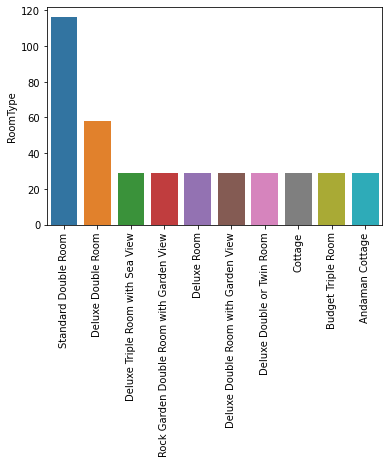

In [33]:
sns.barplot(x = df['RoomType'].value_counts().nlargest(10).index,y = df['RoomType'].value_counts().nlargest(10))
plt.xticks(rotation = 90); # Top 10 Room Types in Dataframe

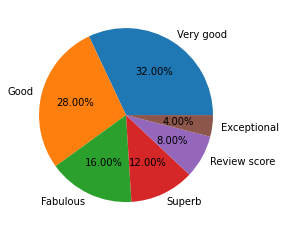

In [36]:
plt.pie(x = df['Badge'].value_counts().values,
       labels =df['Badge'].value_counts().index,
       autopct='%.2f%%');    # % of Hotels with Badges

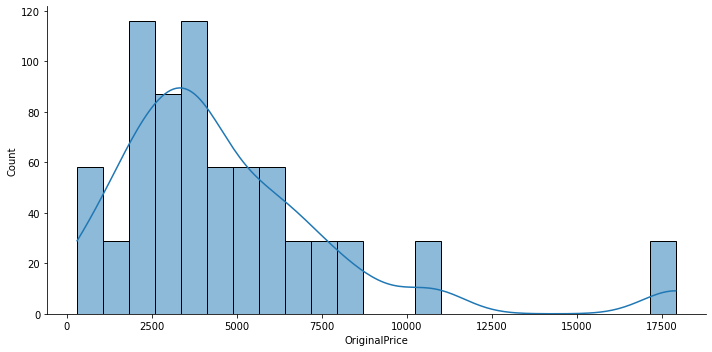

In [38]:
sns.displot(data = df, x = 'OriginalPrice',height=5, aspect = 10/5,kde = True); # Hisdtogram of Original Price

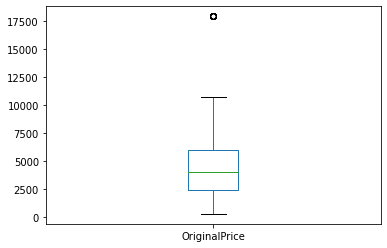

In [39]:
df.OriginalPrice.plot(kind='box'); #

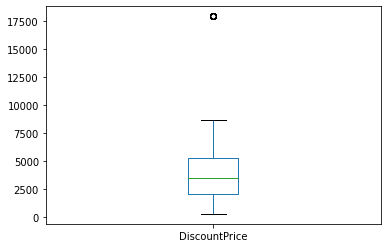

In [40]:
df.DiscountPrice.plot(kind='box'); #

In [95]:
df['Location'].value_counts().nlargest(10) # Top 10 Location By the Number Of Hotels

Neil Island                     58
Kumta                           58
Cavelossim Beach, Cavelossim    58
Dapoli                          58
Arambol beach, Arambol          58
Harihareshwar                   29
Gokarna                         29
Ratnagiri                       29
Konārka                         29
Port Blair                      29
Name: Location, dtype: int64

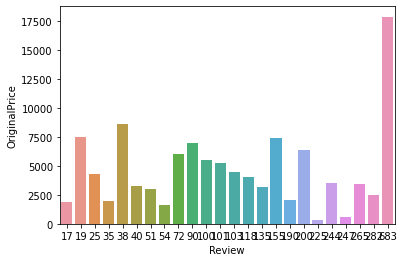

In [108]:
sns.barplot(data = df, x= 'Review', y = 'OriginalPrice',ci = None);  # Top 10 Location By the Number Of Hotels

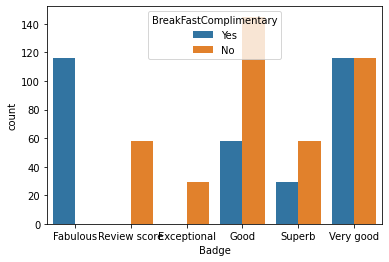

In [111]:
sns.countplot(data = df, x= 'Badge', hue = 'BreakFastComplimentary');

In [43]:
df['BreakFastComplimentary'].value_counts() # Number of hotels with Breakfast Available

No     406
Yes    319
Name: BreakFastComplimentary, dtype: int64

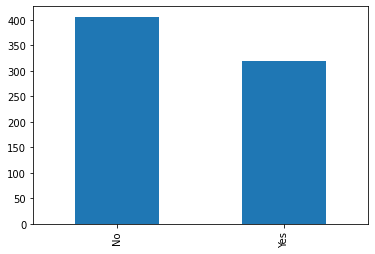

In [44]:
df['BreakFastComplimentary'].value_counts().plot(kind = 'bar');

## Bivariate

In [45]:
df.groupby(['Title'])['OriginalPrice'].mean().nlargest(10) # comparison of Hotels with Price


Title
The Leela Goa                                 17900.0
Niraamaya Retreats, Surya Samudra, Kovalam    10750.0
Praia Da Oura - Boutique Resort                8640.0
Adhvasaha Beach Spa Resort                     7499.0
Sea Shell Neil                                 7000.0
The Byke Old Anchor Beach Resort & Spa         6345.0
Lotus Resort                                   5999.0
Hotel Murud Marina                             5500.0
Tranquil Beach Resort                          5298.0
5 Mile Beach Resort                            4500.0
Name: OriginalPrice, dtype: float64

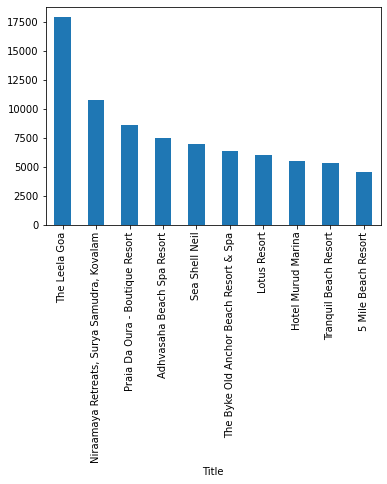

In [46]:
df.groupby(['Title'])['OriginalPrice'].mean().nlargest(10).plot(kind = 'bar');  # comparison of Hotels with Price

In [47]:
df.groupby(['Title'])['DiscountPrice'].mean().nlargest(10)  # comparison of Hotels with DiscountPrice

Title
The Leela Goa                                 17900.0
Praia Da Oura - Boutique Resort                8640.0
Niraamaya Retreats, Surya Samudra, Kovalam     7525.0
Sea Shell Neil                                 7000.0
Lotus Resort                                   5999.0
Hotel Murud Marina                             5500.0
Tranquil Beach Resort                          5298.0
The Byke Old Anchor Beach Resort & Spa         4632.0
Adhvasaha Beach Spa Resort                     4499.0
Pears Beach Resort                             4300.0
Name: DiscountPrice, dtype: float64

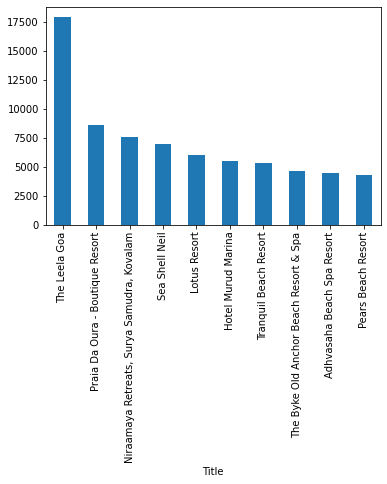

In [48]:
df.groupby(['Title'])['DiscountPrice'].mean().nlargest(10).plot(kind = 'bar'); # comparison of Hotels with DiscountPrice

In [49]:
df.groupby(['Title'])['Review'].mean().nlargest(10) # Comparison Of Hotels With Reviews

Title
The Leela Goa                                             683
New Bombay Heritage Group of Houseboats                   282
Namaste Yoga Farm                                         265
Hotel Prakash                                             247
Blue Ocean Sands - On the Beach                           244
Namahstay ECO Hostel & CoWorking & Art Community Space    225
The Byke Old Anchor Beach Resort & Spa                    200
GoYm Resort                                               190
Lotus A Eco Beach Resort Dapoli Murud                     155
Niraamaya Retreats, Surya Samudra, Kovalam                155
Name: Review, dtype: int32

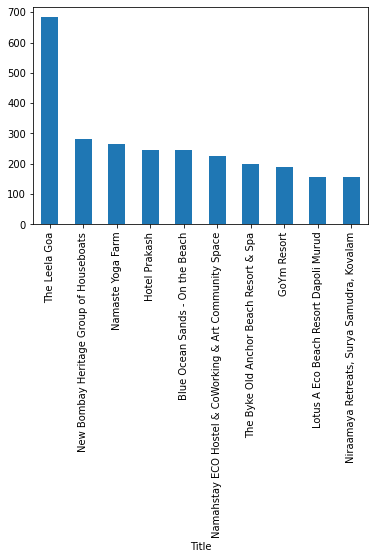

In [50]:
df.groupby(['Title'])['Review'].mean().nlargest(10).plot(kind = 'bar');

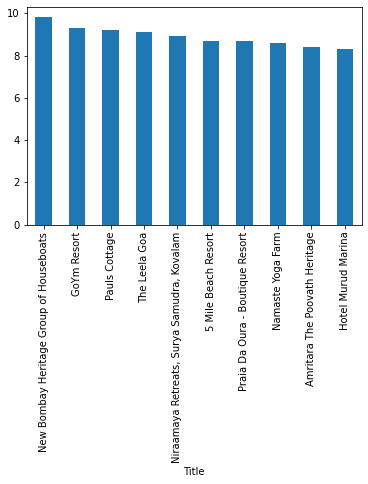

In [51]:
df.groupby(['Title'])['Score'].mean().nlargest(10).plot(kind = 'bar'); # Comparison Of Hotels With Score

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   725 non-null    object 
 1   Location                725 non-null    object 
 2   Badge                   725 non-null    object 
 3   Review                  725 non-null    int32  
 4   Score                   725 non-null    float64
 5   OriginalPrice           725 non-null    float64
 6   DiscountPrice           725 non-null    float64
 7   RoomType                725 non-null    object 
 8   BreakFastComplimentary  725 non-null    object 
dtypes: float64(3), int32(1), object(5)
memory usage: 48.3+ KB


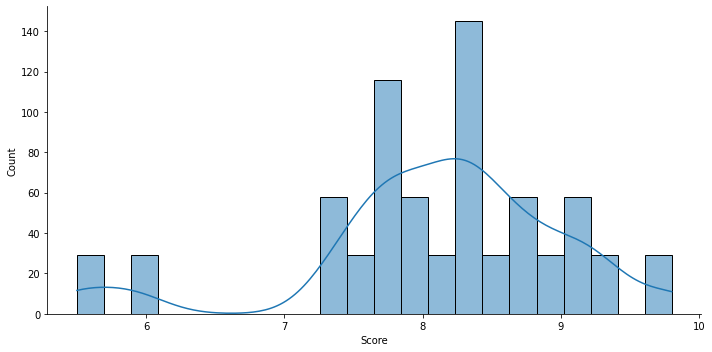

In [53]:
sns.displot(data = df, x = 'Score',height=5, aspect = 10/5,kde = True);

<AxesSubplot:xlabel='Badge'>

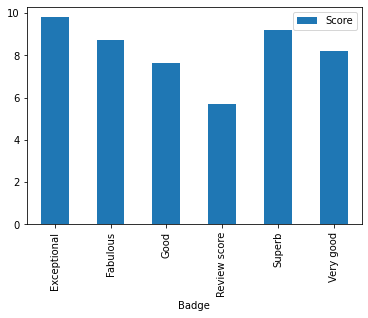

In [54]:
pd.pivot_table(data = df,values='Score', index = 'Badge').plot(kind='bar')

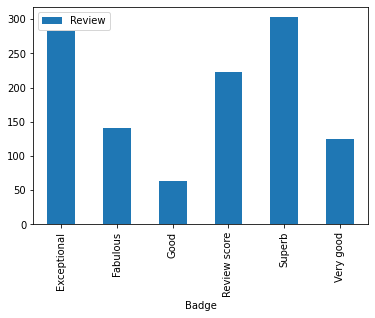

In [55]:
pd.pivot_table(data = df,values='Review', index = 'Badge').plot(kind='bar');

In [58]:
df.groupby(['Badge'])['OriginalPrice'].mean().nlargest(10) # Number of hotels with Their mean Badge and Original Price  

Badge
Superb          7319.666667
Fabulous        6838.750000
Very good       4330.375000
Good            3676.571429
Review score    3472.500000
Exceptional     2447.000000
Name: OriginalPrice, dtype: float64

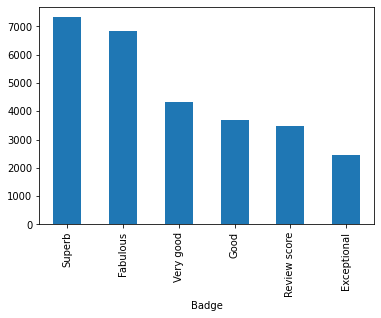

In [59]:
df.groupby(['Badge'])['OriginalPrice'].mean().nlargest(10).plot(kind = 'bar');

In [60]:
df.groupby(['RoomType'])['OriginalPrice'].mean().nlargest(10) # Number of hotels with Their mean RoomType and Original Price 

RoomType
Lagoon Terrace Room                         17900.00
Rock Garden Double Room with Garden View    10750.00
Deluxe Double Room with Garden View          8640.00
Andaman Cottage                              7000.00
Cottage                                      5999.00
Deluxe Suite with Sea View                   5500.00
Executive Ac Chalet                          5298.00
Standard Double Room                         5223.25
Deluxe Triple Room with Sea View             4500.00
Deluxe Double or Twin Room                   4300.00
Name: OriginalPrice, dtype: float64

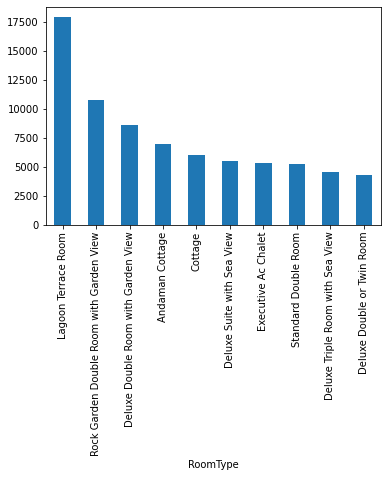

In [114]:
df.groupby(['RoomType'])['OriginalPrice'].mean().nlargest(10).plot(kind = 'bar');

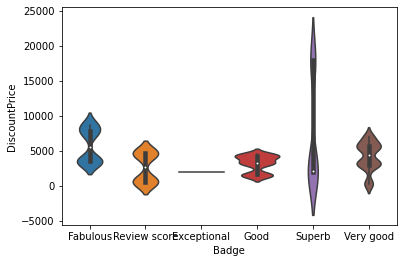

In [62]:
sns.violinplot(data= df, x = 'Badge',y='DiscountPrice');

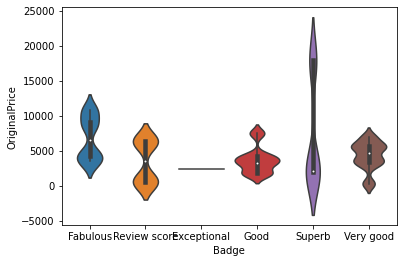

In [63]:
sns.violinplot(data= df, x = 'Badge',y='OriginalPrice');

<AxesSubplot:xlabel='OriginalPrice', ylabel='DiscountPrice'>

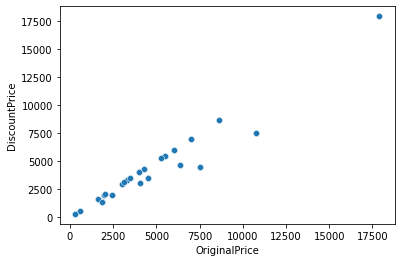

In [64]:
sns.scatterplot(data= df, x = 'OriginalPrice',y='DiscountPrice') # Relationship Between Original and Discount Prices

<AxesSubplot:xlabel='Badge', ylabel='OriginalPrice'>

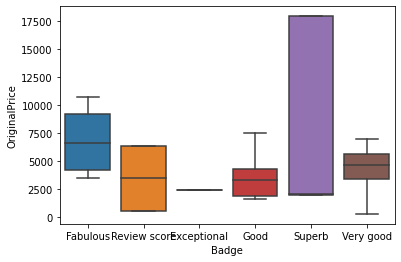

In [65]:
sns.boxplot(data= df, x = 'Badge',y='OriginalPrice')

<AxesSubplot:xlabel='Badge', ylabel='DiscountPrice'>

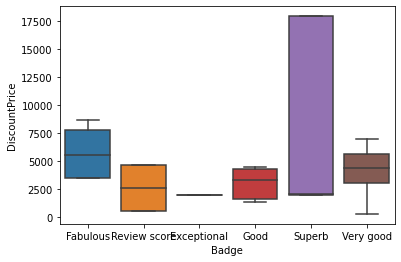

In [66]:
sns.boxplot(data= df, x = 'Badge',y='DiscountPrice')

In [118]:
df.groupby(['Location'])['OriginalPrice'].mean().nlargest(10) # Location based reviews

Location
Cavelossim Beach, Cavelossim    12122.5
Kovalam                         10750.0
Majorda                          8640.0
Port Blair                       7499.0
Konārka                          5999.0
Murud                            5500.0
Harihareshwar                    5298.0
Neil Island                      5075.0
Dapoli                           4150.0
Fort Kochi, Cochin               4050.0
Name: OriginalPrice, dtype: float64

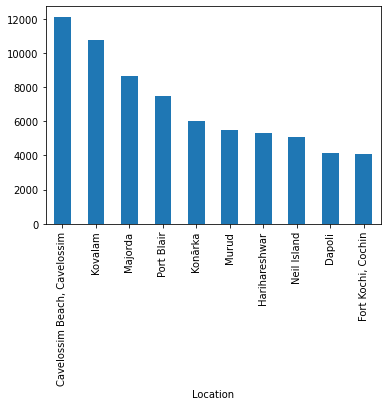

In [119]:
df.groupby(['Location'])['OriginalPrice'].mean().nlargest(10).plot(kind = 'bar'); # Location based reviews

<AxesSubplot:xlabel='OriginalPrice', ylabel='DiscountPrice'>

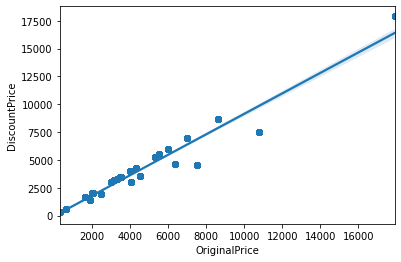

In [69]:
sns.regplot(data =df,x= 'OriginalPrice', y ='DiscountPrice')

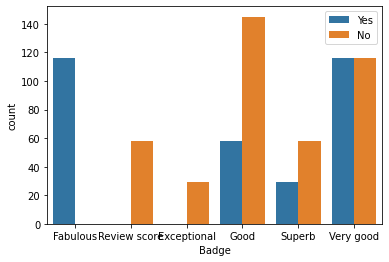

In [70]:
sns.countplot(data = df, x= 'Badge', hue = 'BreakFastComplimentary')
plt.legend();

## Multivariate

In [71]:
df.groupby(['Title','Location',
                'Review']).agg({'OriginalPrice': ['mean'
                                                ,'count']}).index


df.groupby(['Title','Location',
                'Review']).agg({'OriginalPrice': ['mean'
                                                    ,'count']}).columns

MultiIndex([(                                   '5 Mile Beach Resort', ...),
            (                            'Adhvasaha Beach Spa Resort', ...),
            (                         'Amritara The Poovath Heritage', ...),
            (                                      'Baga Beach Myron', ...),
            (                       'Blue Ocean Sands - On the Beach', ...),
            (                                 'Candolim Glitter Sand', ...),
            (                                'Coconhuts Beach Resort', ...),
            (                                           'GoYm Resort', ...),
            (                                    'Hotel Murud Marina', ...),
            (                                         'Hotel Prakash', ...),
            (                                        'Hotel Sea Fans', ...),
            (                 'Lotus A Eco Beach Resort Dapoli Murud', ...),
            (                                          'Lotus Resort', ...),

MultiIndex([('OriginalPrice',  'mean'),
            ('OriginalPrice', 'count')],
           )

In [72]:
df.groupby(['Title','Location',
                'Review'],
              as_index=False).agg({'OriginalPrice': ['mean',
                                                    'median','count']})

Title  \
                                                        
0                                 5 Mile Beach Resort   
1                          Adhvasaha Beach Spa Resort   
2                       Amritara The Poovath Heritage   
3                                    Baga Beach Myron   
4                     Blue Ocean Sands - On the Beach   
5                               Candolim Glitter Sand   
6                              Coconhuts Beach Resort   
7                                         GoYm Resort   
8                                  Hotel Murud Marina   
9                                       Hotel Prakash   
10                                     Hotel Sea Fans   
11              Lotus A Eco Beach Resort Dapoli Murud   
12                                       Lotus Resort   
13  Namahstay ECO Hostel & CoWorking & Art Communi...   
14                                  Namaste Yoga Farm   
15            New Bombay Heritage Group of Houseboats   
16         Niraamaya Retreats, Surya Samudra, Kovalam   
17                                      Pauls Cottage   
18                                 Pears Beach Resort   
19                    Praia Da Oura - Boutique Resort   
20                            Saanvi Resort,Bhavnagar   
21                                     Sea Shell Neil   
22             The Byke Old Anchor Beach Resort & Spa   
23                                      The Leela Goa   
24                              Tranquil Beach Resort   

                        Location Review OriginalPrice                 
                                                 mean   median count  
0                          Kumta    103        4500.0   4500.0    29  
1                     Port Blair     19        7499.0   7499.0    29  
2             Fort Kochi, Cochin    118        4050.0   4050.0    29  
3               Baga Beach, Baga     40        3299.0   3299.0    29  
4                          Kumta    244        3497.0   3497.0    29  
5       Candolim Beach, Candolim     54        1619.0   1619.0    29  
6                    Neil Island    135        3150.0   3150.0    29  
7         Arambol beach, Arambol    190        2060.0   2060.0    29  
8                          Murud    100        5500.0   5500.0    29  
9                     Rāmeswaram    247         600.0    600.0    29  
10                     Ratnagiri     51        2999.0   2999.0    29  
11                        Dapoli    155        4000.0   4000.0    29  
12                       Konārka     72        5999.0   5999.0    29  
13        Arambol beach, Arambol    225         300.0    300.0    29  
14                       Gokarna    265        3465.0   3465.0    29  
15            Dal Lake, Srinagar    282        2447.0   2447.0    29  
16                       Kovalam    155       10750.0  10750.0    29  
17    Calangute Beach, Calangute     35        1999.0   1999.0    29  
18                        Dapoli     25        4300.0   4300.0    29  
19                       Majorda     38        8640.0   8640.0    29  
20                     Bhavnagar     17        1869.0   1869.0    29  
21                   Neil Island     90        7000.0   7000.0    29  
22  Cavelossim Beach, Cavelossim    200        6345.0   6345.0    29  
23  Cavelossim Beach, Cavelossim    683       17900.0  17900.0    29  
24                 Harihareshwar    101        5298.0   5298.0    29

<AxesSubplot:>

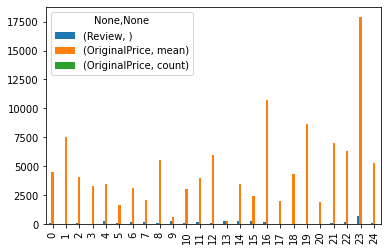

In [73]:
df.groupby(['Title','Location',
                'Review'],
              as_index=False).agg({'OriginalPrice': ['mean'
                                                    ,'count']}).plot(kind = 'bar')

Wall time: 3.11 s


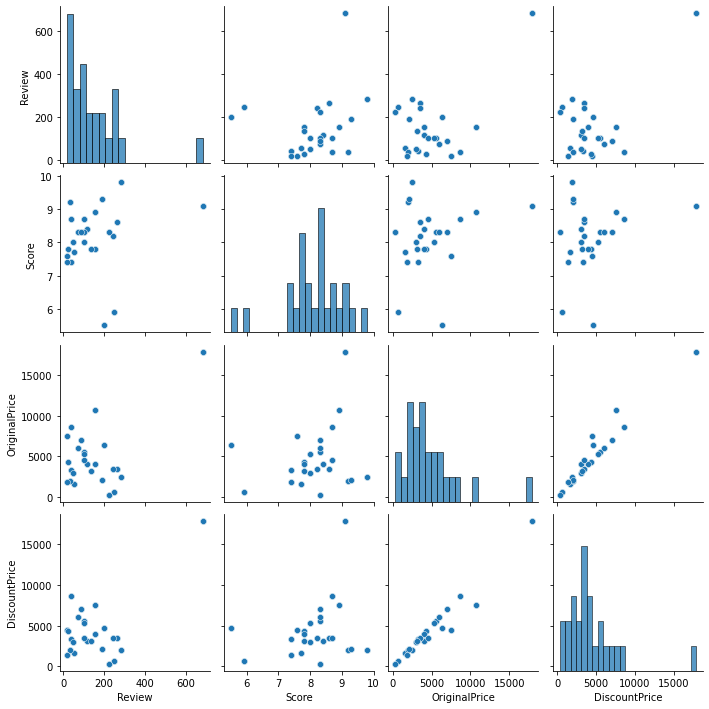

In [74]:
%%time
sns.pairplot(df)

In [75]:
df.corr()

,Review,Score,OriginalPrice,DiscountPrice
Review,1.000000,0.191632,0.488241,0.542469
Score,0.191632,1.000000,0.210642,0.249592
OriginalPrice,0.488241,0.210642,1.000000,0.969306
DiscountPrice,0.542469,0.249592,0.969306,1.000000


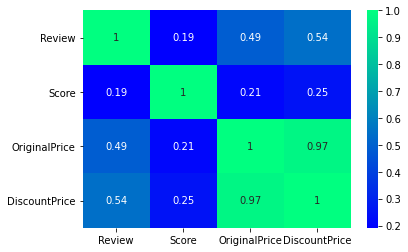

In [76]:
sns.heatmap(df.corr(),cmap= 'winter', annot= True);

In [40]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ='all'
